# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tsa = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe(exclude = 'number')

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsaDesc = []
for i in tsa.columns:
    tsaDesc.append([i, 
                      tsa[i].dtypes, 
                      tsa[i].isna().sum(), 
                      round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                      tsa[i].nunique(),
                      tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2004061055333, 2006122918207]"
1,Date Received,object,70,0.14,3522,"[1-Apr-13, 27-Nov-06]"
2,Incident Date,object,570,1.12,10788,"[10/29/2011 11:00, 8/18/2010 17:15]"
3,Airport Code,object,2052,4.02,405,"[BQK, RIW]"
4,Airport Name,object,2052,4.02,419,"[Daytona Beach International, Hays Regional]"
5,Airline Name,object,8555,16.75,243,"[Malev Hungarian Airlines , Webjet]"
6,Claim Type,object,1960,3.84,8,"[Employee Loss (MPCECA), nan]"
7,Claim Site,object,190,0.37,6,"[nan, -]"
8,Item,object,1012,1.98,1854,[Cell Phones; Game Equipment (poker chips; che...
9,Claim Amount,object,992,1.94,13248,"[$43.36 , $110.72 ]"


In [8]:
tsa.replace('-', np.nan, inplace=True)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.

In [9]:
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'])

In [10]:
errorIdx = []
for i in range(len(tsa)):
    if len(str(tsa['Incident Date'][i])) == 17:
        if str(tsa['Incident Date'][i])[7:10] == '020' or str(tsa['Incident Date'][i])[7:10] == '000':
            errorIdx.append(i)

In [11]:
error = tsa.iloc[errorIdx, :]

In [12]:
error

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [13]:
def replace_year(cols):
    if str(cols['Incident Date'])[7:10] == '020' or str(cols['Incident Date'])[7:10] == '000':
        return '{}{} {}'.format(str(cols['Incident Date'])[:7],str(cols['Date Received'].year),str(cols['Incident Date'])[12:])
    else:
        return cols['Incident Date']

error['Incident Date'] = error[['Incident Date', 'Date Received']].apply(replace_year, axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
tsa['Incident Date'][errorIdx] = error['Incident Date'].values

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [16]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [17]:
error = tsa.iloc[errorIdx,:]

In [18]:
error

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [19]:
tsa['Day Differences'] = tsa['Date Received'] - tsa['Incident Date']
tsa['Day Differences'] = tsa['Day Differences'].dt.days

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 0, 'Day Differences')

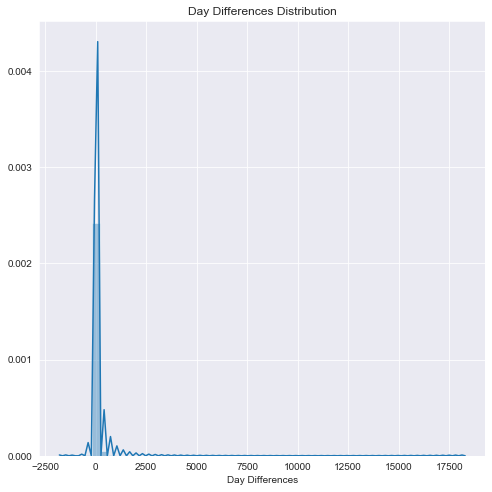

In [20]:
import seaborn as sns
sns.set_style('darkgrid')

dropnan = tsa.dropna()

plt.figure(figsize = (8,8))
sns.distplot(dropnan['Day Differences'])
plt.title('Day Differences Distribution')
plt.xlabel('Day Differences')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

Text(0.5, 0, 'Day Differences')

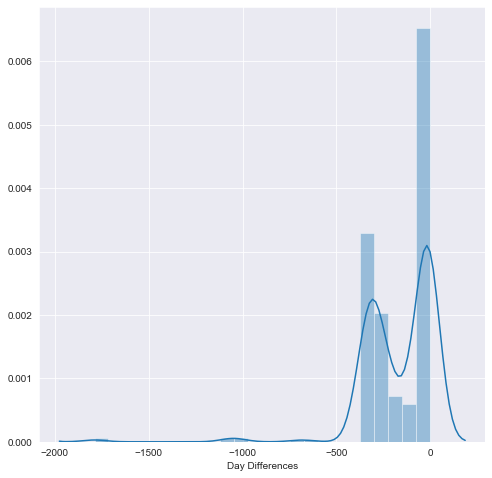

In [21]:
plt.figure(figsize = (8,8))
sns.distplot(tsa[tsa['Day Differences'] < 0]['Day Differences'])
plt.xlabel('Day Differences')

Text(0.5, 0, 'Day Differences')

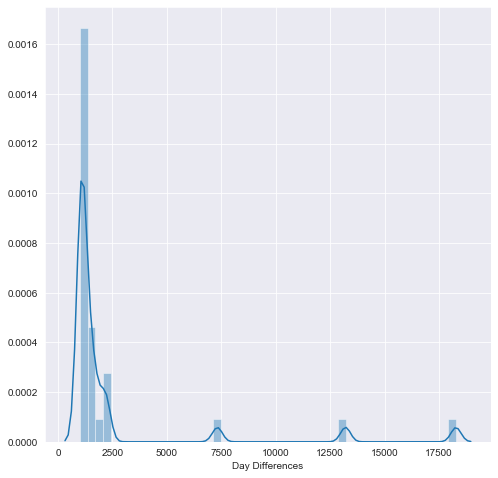

In [22]:
plt.figure(figsize = (8,8))
sns.distplot(tsa[tsa['Day Differences'] > 1000]['Day Differences'])
plt.xlabel('Day Differences')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

## Answer #1

In [23]:
columns = ['Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item', 'Claim Amount', 'Status', 'Close Amount', 'Disposition']
for i in columns:
    print(i)
    print('Less than 0')
    print(tsa[tsa['Day Differences'] < 0][i].value_counts())
    print(' ')
    print('More than 1000')
    print(tsa[tsa['Day Differences'] > 1000][i].value_counts())
    print(' ')

Airport Name
Less than 0
Newark International Airport            21
Los Angeles International Airport       21
Miami International Airport             19
Chicago O'Hare International Airport    19
Phoenix Sky Harbor International        18
                                        ..
Dane County Regional (Madison)           1
Rapid City Regional                      1
El Paso International Airport            1
Burlington; VT                           1
Boise Air Terminal/Gowen Field           1
Name: Airport Name, Length: 116, dtype: int64
 
More than 1000
Hartsfield-Jackson Atlanta International Airport    3
Seattle-Tacoma International                        2
John F. Kennedy International                       2
Non TSA Airport (motor vehicle)                     2
El Paso International Airport                       1
Kileen - Ft. Hood Regional                          1
Baltimore/Washington Intl Thurgood Marshall         1
TSA - Non-Specified Airport                         1
Ft. Lau

#### Tipe klaim yang paling banyak adalah kehilangan barang, dengan Delta Air Lines menjadi urutan teratas dalam memproses klaim dari penumpang (masuk akal, karena barang yang hilang biasanya membutuhkan proses panjang). Sementara itu, klaim yang diproses kurang dari 0 hari dan lebih dari 1000 hari sama-sama kebanyakan terjadi saat pengecekan bagasi.

#### Klaim dengan perbedaaan hari lebih dari 1000 kemungkinan disebabkan oleh besarnya nilai dari barang tersebut (dapat dilhat di atas, mostly nilai barang untuk yang diproses panjang cukup mahal), yang bisa saja menjadikan pihak yang berwenang butuh proses yang panjang untuk memutuskan klaim tersebut.

#### Sementara untuk yang perbedaan harinya kurang dari 0, kemungkinan klaim diselesaikan hari itu juga atau adanya keterlambatan petugas untuk lapor ke TSA, yang klaim diselesaikan dulu baru laporan diinput (masalah administrasi). Atau bisa juga karena faktor human error, seperti kesalahan input tanggal.

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [24]:
tsa['Close Amount'] = tsa['Close Amount'].replace({'\$':''}, regex = True)
tsa['Close Amount'] = tsa['Close Amount'].replace({';':''}, regex = True)
tsa['Close Amount'] = tsa['Close Amount'].apply(lambda x: float(x))
tsa['Claim Amount'] = tsa['Claim Amount'].replace({'\$':''}, regex = True)
tsa['Claim Amount'] = tsa['Claim Amount'].replace({';':''}, regex = True)
tsa['Claim Amount'] = tsa['Claim Amount'].apply(lambda x: float(x))

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [25]:
tsa['Amount Differences'] = tsa['Claim Amount'] - tsa['Close Amount']

In [26]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [27]:
tsa.head(5)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

In [28]:
dropnan = tsa.dropna()

Text(0.5, 0, 'Amount Differences')

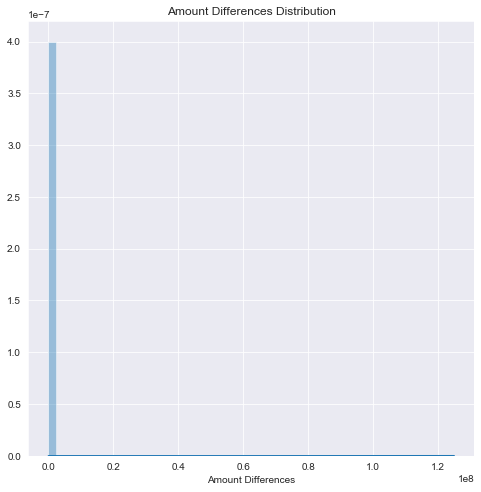

In [29]:
plt.figure(figsize = (8,8))
sns.distplot(dropnan['Amount Differences'])
plt.title('Amount Differences Distribution')
plt.xlabel('Amount Differences')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [30]:
Q1_ad = tsa['Amount Differences'].describe()['25%']
Q3_ad = tsa['Amount Differences'].describe()['75%']
IQR = Q3_ad - Q1_ad

In [31]:
ad_out = tsa[(tsa['Amount Differences'] > Q3_ad + (1.5 * IQR))]
ad = tsa[(tsa['Amount Differences'] <= Q3_ad + (1.5 * IQR))]

In [32]:
ad_out

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [33]:
ad_out['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [34]:
ad_out['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

## Answer #2

Text(0.5, 1.0, 'Close Amount Outlier data')

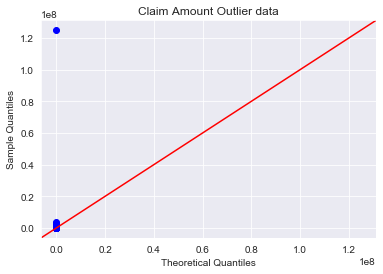

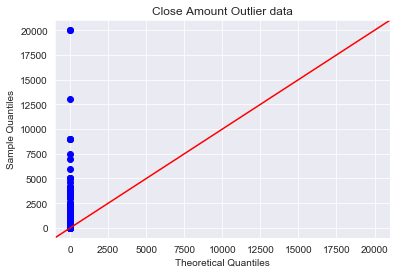

In [35]:
import statsmodels.api as sm
import pylab

sm.qqplot(ad_out['Claim Amount'], line = '45')
plt.title('Claim Amount Outlier data')

sm.qqplot(ad_out['Close Amount'], line = '45')
plt.title('Close Amount Outlier data')

In [36]:
#Do normality test

from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [37]:
try_normal(ad_out['Claim Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1559.8322253694841},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [38]:
try_normal(ad_out['Close Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1244.9229604344491},
 'Shapiro': 0.0,
 'K^2': 0.0}

Kedua data outlier tidak terdistribusi normal.

Text(0.5, 1.0, 'Close Amount Non-Outlier data')

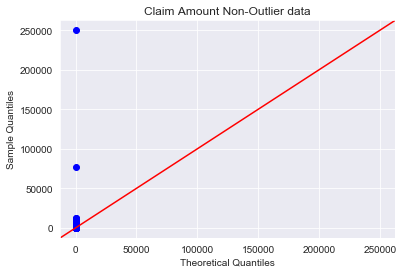

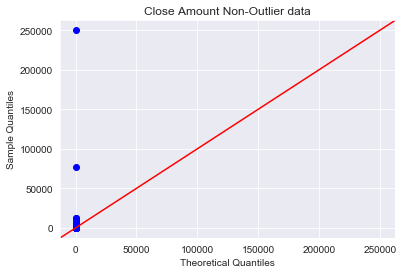

In [39]:
sm.qqplot(ad['Claim Amount'], line = '45')
plt.title('Claim Amount Non-Outlier data')

sm.qqplot(ad['Close Amount'], line = '45')
plt.title('Close Amount Non-Outlier data')

In [40]:
try_normal(ad['Claim Amount'])

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 8141.234927112389},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [41]:
try_normal(ad['Close Amount'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 9617.577509332841},
 'Shapiro': 0.0,
 'K^2': 0.0}

Kedua data non-outlier juga tidak terdistribusi normal.

In [42]:
(ad_out['Claim Amount'].median())

1821.75

In [43]:
ad_out['Close Amount'].median()

0.0

In [44]:
ad['Claim Amount'].median()

139.99

In [45]:
ad['Close Amount'].median()

10.0

#### Jika melihat dari nilai Median data outlier dan non-outlier dari Claim Amount & Close Amount, maka saya setuju dengan pendapat di atas. Karena perbedaaan nilai Median pada data outlier lebih besar daripada perbedaan nilai Median pada data non-outlier. Lakukan tes lainnya.

In [46]:
from scipy.stats import levene, bartlett, kruskal

In [47]:
levene(ad_out['Claim Amount'], ad_out['Close Amount'])

LeveneResult(statistic=1.7423510662913355, pvalue=0.18687803519500246)

In [48]:
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(ad_out['Claim Amount'], ad_out['Close Amount']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 261430.5
P-Value: 0.0


Perbedaaan antara Claim Amount dan Close Amount pada outlier besar dilihat dari nilai U-Statistic.

In [49]:
levene(ad['Claim Amount'], ad['Close Amount'])

LeveneResult(statistic=44.04776745683587, pvalue=3.2323535819784387e-11)

In [50]:
result = list(mannwhitneyu(ad['Claim Amount'], ad['Close Amount']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 174045689.0
P-Value: 0.0


#### Perbedaaan antara Claim Amount dan Close Amount besar dilihat dari nilai U-Statistic, bahkan lebih besar dari data outlier. Maka, setelah dilakukan uji variance, ternyata asumsi kita terbukti berbanding terbalik. Bisa jadi ada faktor lain.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

### Answer #3-1

In [51]:
tsa['Airport Name'].value_counts()

John F. Kennedy International           2286
Los Angeles International Airport       1813
Newark International Airport            1747
Chicago O'Hare International Airport    1712
Orlando International Airport           1633
                                        ... 
Altoona Blair County                       1
Dodge City Regional                        1
Mid Ohio Valley Regional                   1
Groton - New London; CT                    1
Williamson County                          1
Name: Airport Name, Length: 418, dtype: int64

In [52]:
# Check the top Airport
tsa[tsa['Airport Name'] == 'John F. Kennedy International']['Claim Type'].value_counts()

Passenger Property Loss    1607
Property Damage             599
Personal Injury              16
Passenger Theft               6
Motor Vehicle                 3
Employee Loss (MPCECA)        2
Name: Claim Type, dtype: int64

In [53]:
tsa['Claim Type'].value_counts()

Passenger Property Loss    29713
Property Damage            18590
Personal Injury              394
Passenger Theft              115
Employee Loss (MPCECA)       114
Motor Vehicle                 96
Complaint                     13
Name: Claim Type, dtype: int64

In [54]:
tsa[['Airport Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr()

,Airport Name,Claim Type
Airport Name,1.000000,0.059168
Claim Type,0.059168,1.000000


In [55]:
tsa[['Airport Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Airport Name,Claim Type
Airport Name,1.000000,0.042477
Claim Type,0.042477,1.000000


Berdasarkan hasil uji korelasi di atas, terlihat tidak ada korelasi/hubungan antara Airport Name & Claim Type.

In [56]:
tsa['Airline Name'].value_counts()

American Airlines             4377
Delta Air Lines               4371
UAL                           3507
Southwest Airlines            3258
Continental Airlines          2363
                              ... 
Commercial Airways               1
Big Sky Airlines                 1
Croatia Airlines                 1
Mountain West                    1
Malaysian Airline System         1
Name: Airline Name, Length: 242, dtype: int64

In [57]:
# Check the top arilines
tsa[tsa['Airline Name'] == 'American Airlines']['Claim Type'].value_counts()

Passenger Property Loss    2646
Property Damage            1507
Personal Injury              24
Passenger Theft              17
Employee Loss (MPCECA)       16
Complaint                     1
Name: Claim Type, dtype: int64

In [58]:
tsa[['Airline Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr()

,Airline Name,Claim Type
Airline Name,1.000000,0.057824
Claim Type,0.057824,1.000000


In [59]:
tsa[['Airline Name','Claim Type']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Airline Name,Claim Type
Airline Name,1.00000,0.11976
Claim Type,0.11976,1.00000


Berdasarkan hasil uji korelasi di atas, terlihat tidak ada korelasi/hubungan antara Airline Name & Claim Type.

In [60]:
claim_nan = tsa[tsa['Claim Type'].isna()]

In [61]:
for i in claim_nan.columns:
    print(i,'have',claim_nan[i].isna().sum(),'NaN')

Claim Number have 0 NaN
Date Received have 35 NaN
Incident Date have 382 NaN
Airport Code have 547 NaN
Airport Name have 547 NaN
Airline Name have 1003 NaN
Claim Type have 2031 NaN
Claim Site have 130 NaN
Item have 154 NaN
Claim Amount have 473 NaN
Status have 52 NaN
Close Amount have 496 NaN
Disposition have 571 NaN
Day Differences have 384 NaN
Amount Differences have 688 NaN


In [62]:
claim_nan['Item'].value_counts().head(5)

Other                                         563
Luggage (all types including footlockers)     268
Clothing - Shoes; belts; accessories; etc.    257
Jewelry - Fine                                192
Cameras - Digital                             145
Name: Item, dtype: int64

#### Seperti yang dapat dilihat di atas tidak ada hubungan antara Airport Name & Arline Name dengan Claim Type. Banyaknya NaN di Claim Type bisa terjadi karena multiple input dari petugas/pelapor atau bisa juga tidak diisinya data tersebut.

### Question

2. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

### Answer #3-2

In [63]:
tsa['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'Closed as a contractor claim', 'In review', 'Claim entered',
       'Deny', nan, 'Settle', 'Approve in Full'], dtype=object)

In [64]:
tsa['Disposition'].unique()

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

In [65]:
tsa[tsa['Status'] == 'Denied']['Disposition'].value_counts()

Deny    17125
Name: Disposition, dtype: int64

In [66]:
tsa[tsa['Status'] == 'Approved']['Disposition'].value_counts()

Approve in Full    8724
Name: Disposition, dtype: int64

In [67]:
tsa[tsa['Status'] == 'Settled']['Disposition'].value_counts()

Settle    6970
Name: Disposition, dtype: int64

In [68]:
tsa['Disposition'].value_counts()

Deny               17147
Approve in Full     8727
Settle              6972
Name: Disposition, dtype: int64

In [69]:
checkThreeStatus = tsa[(tsa['Status'] == 'Denied') | (tsa['Status'] == 'Approved') | (tsa['Status'] == 'Settled')]

In [70]:
checkThreeStatus[['Disposition','Status']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Disposition,Status
Disposition,1.00000,0.99945
Status,0.99945,1.00000


In [71]:
checkThreeStatus[['Disposition','Status']].apply(lambda x: x.factorize()[0]).corr()

,Disposition,Status
Disposition,1.000000,0.998848
Status,0.998848,1.000000


Korelasi antara Disposition dengan tiga Status yang kelasnya sama sangat kuat.

In [72]:
tsa.columns

Index(['Claim Number', 'Date Received', 'Incident Date', 'Airport Code',
       'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item',
       'Claim Amount', 'Status', 'Close Amount', 'Disposition',
       'Day Differences', 'Amount Differences'],
      dtype='object')

In [73]:
tsa[['Status','Item']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Status,Item
Status,1.000000,0.279619
Item,0.279619,1.000000


In [74]:
tsa[['Status','Item']].apply(lambda x: x.factorize()[0]).corr()

,Status,Item
Status,1.0000,0.5901
Item,0.5901,1.0000


Ada korelasi juga antara Status dengan Item.

In [75]:
tsa[['Disposition','Item']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Disposition,Item
Disposition,1.000000,-0.388485
Item,-0.388485,1.000000


In [76]:
tsa[['Disposition','Item']].apply(lambda x: x.factorize()[0]).corr()

,Disposition,Item
Disposition,1.000000,-0.600032
Item,-0.600032,1.000000


Begitu pun antara Disposisi & Item, keduanya berkorelasi walaupun negatif.

In [77]:
tsa[['Status','Amount Differences']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Status,Amount Differences
Status,1.000000,-0.207765
Amount Differences,-0.207765,1.000000


In [78]:
tsa[['Status','Amount Differences']].apply(lambda x: x.factorize()[0]).corr('pearson')

,Status,Amount Differences
Status,1.000000,-0.166247
Amount Differences,-0.166247,1.000000


Sementara itu, tidak ada korelasi antara Status dengan Amount Differences.

In [79]:
tsa[['Disposition','Amount Differences']].apply(lambda x: x.factorize()[0]).corr('spearman')

,Disposition,Amount Differences
Disposition,1.000000,0.830399
Amount Differences,0.830399,1.000000


In [80]:
tsa[['Disposition','Amount Differences']].apply(lambda x: x.factorize()[0]).corr()

,Disposition,Amount Differences
Disposition,1.000000,0.423439
Amount Differences,0.423439,1.000000


#### Disposition & Amount Differences memiliki korelasi. 

#### Secara statistik, Disposisi dapat mempengaruhi Status dan Amount Differences mempengaruhi Disposition. Menetapkan nilai klaim yang sesuai memungkinkan klaim tersebut Approved atau Settled. 

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [81]:
np.random.seed(101)

In [82]:
df = ad.dropna()

In [83]:
df = df.sample(1000)

In [84]:
df.to_csv('tsa_claims_dashboard_ujian.csv', index=False)